In [7]:
import requests
import json

# Let's get the data from the Citibike API
url = 'http://www.citibikenyc.com/stations/json'
resp = requests.get(url)

# We transform the returned JSON answer from the API into a Python dictionary object
results = json.loads(resp.text)

# We only need a subset of the data in the JSON returned by the Citibike API, so we keep only we need
data = results["stationBeanList"]

# The code below is just to be able to look at the results in an easy-to-read DataFrame format.
# Our subsequent code that interacts with MySQL will operate using the dictionary object named "data".
import pandas

df = pandas.DataFrame(data)
df

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,4,34,,72,,2015-12-09 11:21:22 AM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,39
1,,30,0,,79,,2015-12-09 11:22:19 AM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33
2,,11,16,,82,,2015-12-09 11:19:30 AM,40.711174,,-74.000165,,St James Pl & Pearl St,,St James Pl & Pearl St,1,In Service,False,27
3,,11,50,,83,,2015-12-09 11:22:12 AM,40.683826,,-73.976323,,Atlantic Ave & Fort Greene Pl,,Atlantic Ave & Fort Greene Pl,1,In Service,False,62
4,,38,0,,116,,2015-12-09 11:19:36 AM,40.741776,,-74.001497,,W 17 St & 8 Ave,,W 17 St & 8 Ave,1,In Service,False,39
5,,6,13,,119,,2015-12-09 11:21:34 AM,40.696089,,-73.978034,,Park Ave & St Edwards St,,Park Ave & St Edwards St,1,In Service,False,19
6,,0,19,,120,,2015-12-09 11:21:23 AM,40.686768,,-73.959282,,Lexington Ave & Classon Ave,,Lexington Ave & Classon Ave,1,In Service,False,19
7,,22,8,,127,,2015-12-09 11:20:53 AM,40.731724,,-74.006744,,Barrow St & Hudson St,,Barrow St & Hudson St,1,In Service,False,31
8,,29,0,,128,,2015-12-09 11:22:27 AM,40.727103,,-74.002971,,MacDougal St & Prince St,,MacDougal St & Prince St,1,In Service,False,30
9,,43,3,,137,,2015-12-09 11:21:19 AM,40.761628,,-73.972924,,E 56 St & Madison Ave,,E 56 St & Madison Ave,1,In Service,False,46


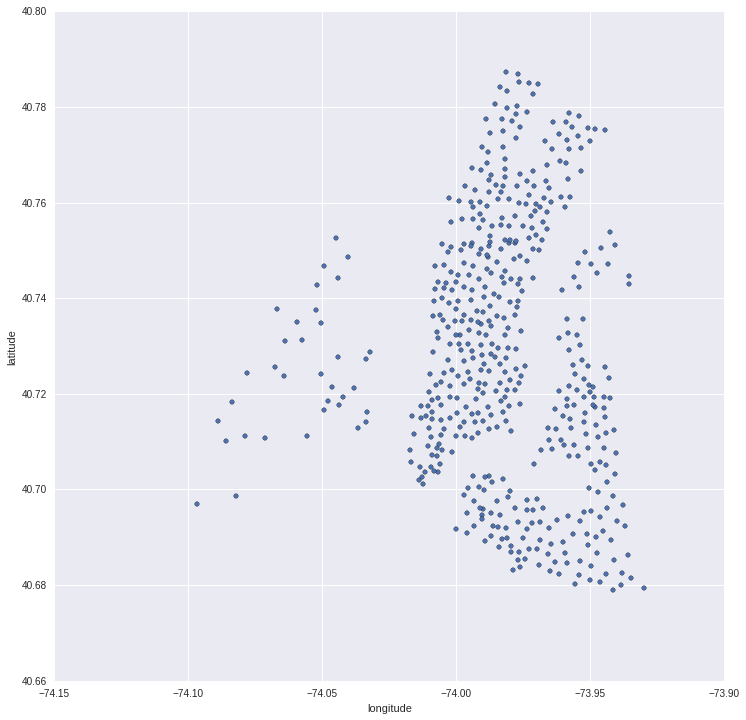

In [8]:
%matplotlib inline
import seaborn as sns
import matplotlib as plt

# This defines the size of the image below
plt.rcParams['figure.figsize'] = (12, 12)

# Let's do a first plot. Put the stations on a scatterplot based on
# their longitude and latitude
df.plot(kind='scatter', x='longitude', y='latitude')

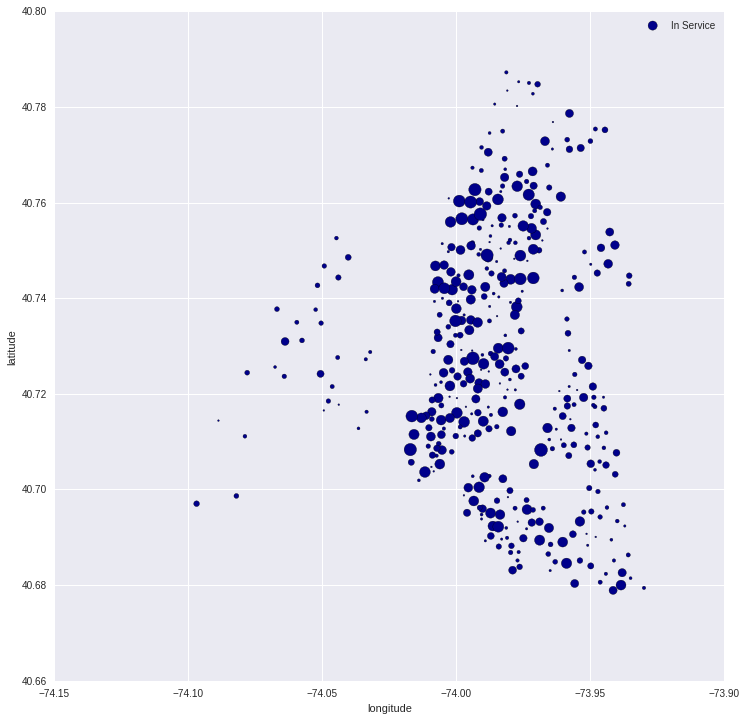

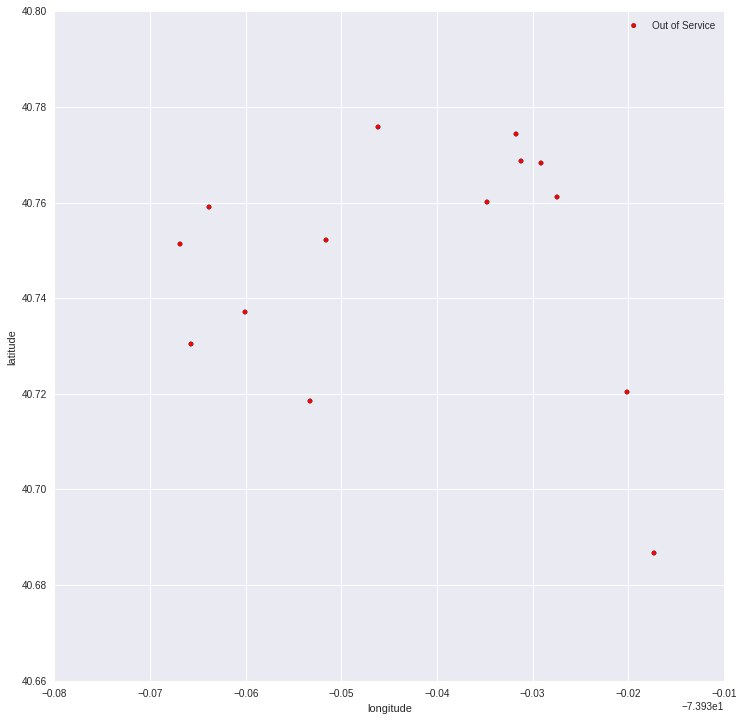

In [9]:
# Lets plot the stations that are out of service in red
inservice = (df["statusValue"] == 'In Service')
outofservice = (df["statusValue"] == 'Not In Service')

df[inservice].plot(kind='scatter', x='longitude', y='latitude', color='DarkBlue', label='In Service', s=3*(df['availableBikes']))
df[outofservice].plot(kind='scatter', x='longitude', y='latitude', color='Red', label = 'Out of Service')

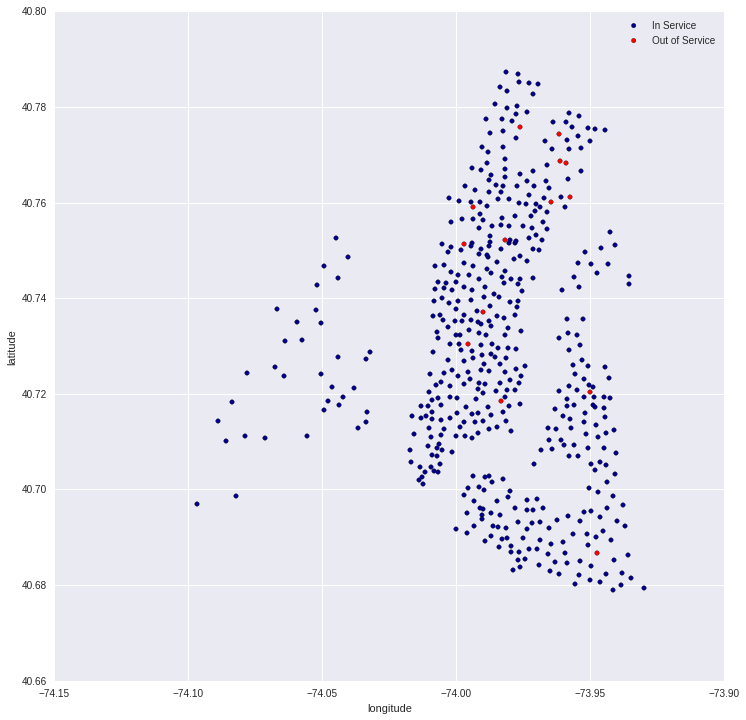

In [10]:
# Lets merge the two plots
# we will use the "ax" convention
inservice = (df["statusValue"] == 'In Service')
outofservice = (df["statusValue"] == 'Not In Service')

firstplot = df[inservice].plot(kind='scatter', x='longitude', y='latitude', color='DarkBlue', label='In Service')
df[outofservice].plot(kind='scatter', x='longitude', y='latitude', color='Red', label = 'Out of Service', ax = firstplot)

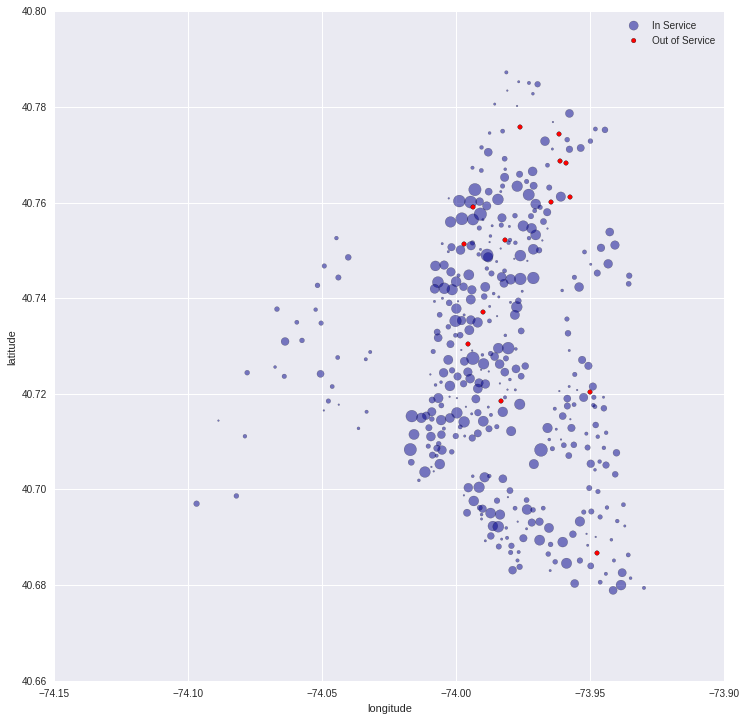

In [11]:
# And now make the size of each point proportional to the size of available bikes
# using the s option in the plot
inservice = (df["statusValue"] == 'In Service')
outofservice = (df["statusValue"] == 'Not In Service')

# We also add the "alpha=0.5" to add transparency
firstplot = df[inservice].plot(kind='scatter', x='longitude', y='latitude', color='DarkBlue', alpha=0.5, label='In Service', s=3*(df['availableBikes']))
df[outofservice].plot(kind='scatter', x='longitude', y='latitude', color='Red', ax = firstplot, label = 'Out of Service')